**Import Statements**

In [329]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**Read CSV file**

In [330]:
df = pd.read_csv('ThoracicSurgery.csv')
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


**Exploratory Data Analysis**

In [331]:
df.shape

(454, 17)

In [332]:
df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [333]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [334]:
df['Death_1yr'].value_counts()
# 0 - Deaths
# 1 - Survived

0    385
1     69
Name: Death_1yr, dtype: int64

In [335]:
df.groupby('Death_1yr').mean()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
Death_1yr,,,,,,,,,,,,,,,,
0,3.070130,3.304597,2.540805,0.774026,0.051948,0.124675,0.044156,0.677922,0.158442,1.683117,0.062338,0.005195,0.015584,0.815584,0.005195,62.677922
1,3.217391,3.195072,2.383188,0.913043,0.101449,0.202899,0.115942,0.797101,0.246377,2.014493,0.144928,0.000000,0.028986,0.898551,0.000000,63.333333


C:\Users\Karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Death_1yr', ylabel='count'>

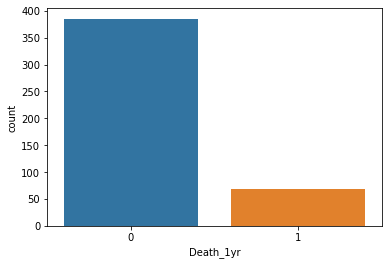

In [336]:
sns.countplot(df['Death_1yr'])

In [337]:
df = df.drop('Diagnosis', axis = 1)

In [338]:
# df.plot(x = 'Age', y = 'Death_1yr', kind='scatter')
# plt.show()

**Data Pre-processing**

In [339]:
X = df.drop(['Death_1yr'], axis = 1)
Y = df['Death_1yr']

In [340]:
X.head()

,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73


In [341]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Death_1yr, dtype: int64

**Test and Train Data Split**

In [342]:
X_tr, X_tst, Y_tr, Y_tst = train_test_split(X, Y, test_size = 0.3, random_state = 17)
print(X.shape, X_tst.shape, X_tr.shape)

(454, 15) (137, 15) (317, 15)


**Standardization**

In [343]:
scaler = StandardScaler()
scaler.fit(X_tr)

StandardScaler()

In [344]:
X_tr.head()

,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
369,3.40,2.16,1,1,1,0,1,0,2,0,0,0,0,0,68
11,4.28,4.44,1,0,0,0,0,0,2,0,0,0,1,0,58
437,2.84,2.32,1,0,1,0,1,1,1,0,0,0,1,0,72
101,2.84,1.88,1,0,0,0,1,0,1,0,0,0,0,0,53
332,2.50,1.40,1,0,1,0,1,0,1,0,0,0,1,0,77


In [345]:
X_tr = scaler.transform(X_tr)
X_tst = scaler.transform(X_tst)

In [346]:
X_tr

array([[ 0.09778635, -0.45219142,  0.35863743, ..., -2.18257563,
        -0.07968191,  0.60759778],
       [ 1.06682652,  2.34549624,  0.35863743, ...,  0.45817427,
        -0.07968191, -0.5233975 ],
       [-0.51887558, -0.25586246,  0.35863743, ...,  0.45817427,
        -0.07968191,  1.05999589],
       ...,
       [ 0.36207004,  0.28404217,  0.35863743, ...,  0.45817427,
        -0.07968191,  1.28619494],
       [ 0.84659012,  0.82394681, -1.50510136, ...,  0.45817427,
        -0.07968191, -0.86269608],
       [-0.60697014, -0.94301382,  0.35863743, ...,  0.45817427,
        -0.07968191, -0.18409892]])

**SVM Model**

In [347]:
svm = svm.SVC(kernel = 'linear')
svm.fit(X_tr, Y_tr)

SVC(kernel='linear')

In [348]:
svm_tr_prediction = svm.predict(X_tr)
print(f'Accuracy of SVM Train Data: {accuracy_score(Y_tr, svm_tr_prediction)}')

svm_tst_prediction = svm.predict(X_tst)
print(f'Accuracy of SVM Test Data: {accuracy_score(Y_tst, svm_tst_prediction)}')

Accuracy of SVM Train Data: 0.8485804416403786
Accuracy of SVM Test Data: 0.8467153284671532


**Decision Tree**

In [349]:
dt = DecisionTreeClassifier(criterion = "gini",splitter = "best",max_depth = 5)
dt.fit(X_tr, Y_tr)

DecisionTreeClassifier(max_depth=5)

In [350]:
dt_tr_prediction = dt.predict(X_tr)
print(f'Accuracy of Decision Tree Train Data: {accuracy_score(Y_tr, dt_tr_prediction)}')

dt_tst_prediction = dt.predict(X_tst)
print(f'Accuracy of Decision Tree Test Data: {accuracy_score(Y_tst, dt_tst_prediction)}')

Accuracy of Decision Tree Train Data: 0.8990536277602523
Accuracy of Decision Tree Test Data: 0.781021897810219


**Random Forest**

In [351]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_tr, Y_tr)

RandomForestClassifier(max_depth=5)

In [352]:
rf_tr_prediction = rf.predict(X_tr)
print(f'Accuracy of Random Forest Train Data: {accuracy_score(Y_tr, rf_tr_prediction)}')

rf_tst_prediction = rf.predict(X_tst)
print(f'Accuracy of Random Forest Test Data: {accuracy_score(Y_tst, rf_tst_prediction)}')

Accuracy of Random Forest Train Data: 0.8643533123028391
Accuracy of Random Forest Test Data: 0.8467153284671532


In [353]:
final_tr_pred = [mode([i, j, k])[0][0] for i, j, k in zip(svm.predict(X_tr), dt.predict(X_tr), rf.predict(X_tr))]
final_tst_pred = [mode([i, j, k])[0][0] for i, j, k in zip(svm.predict(X_tst), dt.predict(X_tst), rf.predict(X_tst))]
print(f'Accuracy of the Train Data: {accuracy_score(Y_tr, final_tr_pred)*100}')
print(f'Accuracy of the Test Data: {accuracy_score(Y_tst, final_tst_pred)*100}')

Accuracy of the Train Data: 86.43533123028391
Accuracy of the Test Data: 84.67153284671532


**Confusion Matrix**

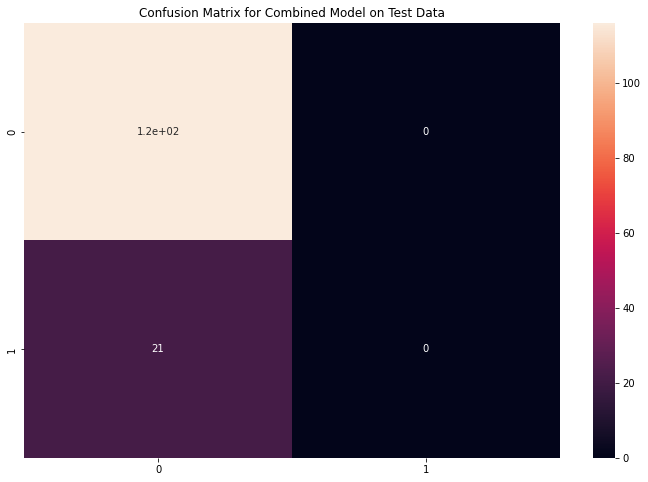

In [354]:
cf_matrix = confusion_matrix(Y_tst, final_tst_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Data")
plt.show()

**Classification Report**

In [355]:
print(classification_report(Y_tst, final_tst_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
file1 = 'SVM_Model.sav'
pickle.dump(svm, open(file1, 'wb'))
file2 = 'DT_Model.sav'
pickle.dump(dt, open(file2, 'wb'))
file3 = 'RF_Model.sav'
pickle.dump(dt, open(file3, 'wb'))